### 数据导入


In [1]:
# 选择需要的因子
indicators = [
    "macd", "bbi", "ad", "ama", "pdi","mdi", 'mom',"sar",
    "kdj", "rsi", "roc", "bias", "cci", "osc", "cmo", "apo", 'ao',
     "bopa", "mfi", "wr", 'tema', 'vhf', 'cmf', 'vris', 'k', 'd', 'ri', 'cvi','obv']

rolling_window = 252
contract = 'T' #可换为T、TL、TF

In [2]:
# 滚动窗口更新信号并应用
import os
import pandas as pd
# 设置文件路径
file_path = f'rolling_data_{contract}_{rolling_window}.csv'# 如果文件已存在，加载已保存的数据
rolling_signal = pd.read_csv(file_path)
rolling_signal['date'] = pd.to_datetime(rolling_signal.date)

file_path = f'signal_data_{contract}.csv'# 如果文件已存在，加载已保存的数据
signal_data = pd.read_csv(file_path)
signal_data['date'] = pd.to_datetime(signal_data.date)

In [3]:
rolling_signal

,date,close,high,low,open,volume,mom,cmo,apo,macd,...,d_condition,ri_value,ri_sign,ri_condition,cvi_value,cvi_sign,cvi_condition,obv_value,obv_sign,obv_condition
0,2015-03-20,97.090,97.960,96.530,96.900,3332.0,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-03-23,97.020,97.095,96.840,97.095,1386.0,NaN,-100.000000,NaN,-0.009697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-24,96.920,97.220,96.875,97.135,1380.0,NaN,-100.000000,NaN,-0.028621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-25,96.850,97.030,96.760,97.020,1234.0,NaN,-100.000000,NaN,-0.047509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-03-26,96.370,96.890,96.370,96.835,1073.0,NaN,-100.000000,NaN,-0.121764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,2025-09-15,107.805,107.875,107.670,107.690,94600.0,-0.195,-13.588850,-0.02950,-0.006105,...,turn_warm,44.973545,1.0,cool,0.041072,1.0,cool,4678178.0,1.0,cool
2554,2025-09-16,108.000,108.085,107.580,107.680,138741.0,0.045,2.839117,-0.02225,0.040859,...,turn_warm,49.514563,1.0,cool,0.044359,1.0,cool,4816919.0,1.0,cool
2555,2025-09-17,108.155,108.165,107.915,107.985,101611.0,-0.005,-0.325733,-0.03775,0.090548,...,turn_warm,59.045226,1.0,turn_warm,0.043611,1.0,cool,4918530.0,1.0,cool
2556,2025-09-18,108.080,108.125,107.985,108.065,93558.0,-0.180,-11.920530,-0.05975,0.106406,...,turn_warm,56.585366,1.0,turn_warm,0.042592,1.0,cool,4824972.0,1.0,cool


In [4]:
merged_signal = rolling_signal.merge(
    signal_data[['date']+[signal for signal in signal_data.columns if 'signal' in signal]], 
    left_on='date', 
    right_on='date', 
    how='inner',  # 'inner' 保证只保留那些在两个 DataFrame 中都有的日期
    suffixes=('_c','_s')
)

#### 回测

************************************* cmo_sign *************************************


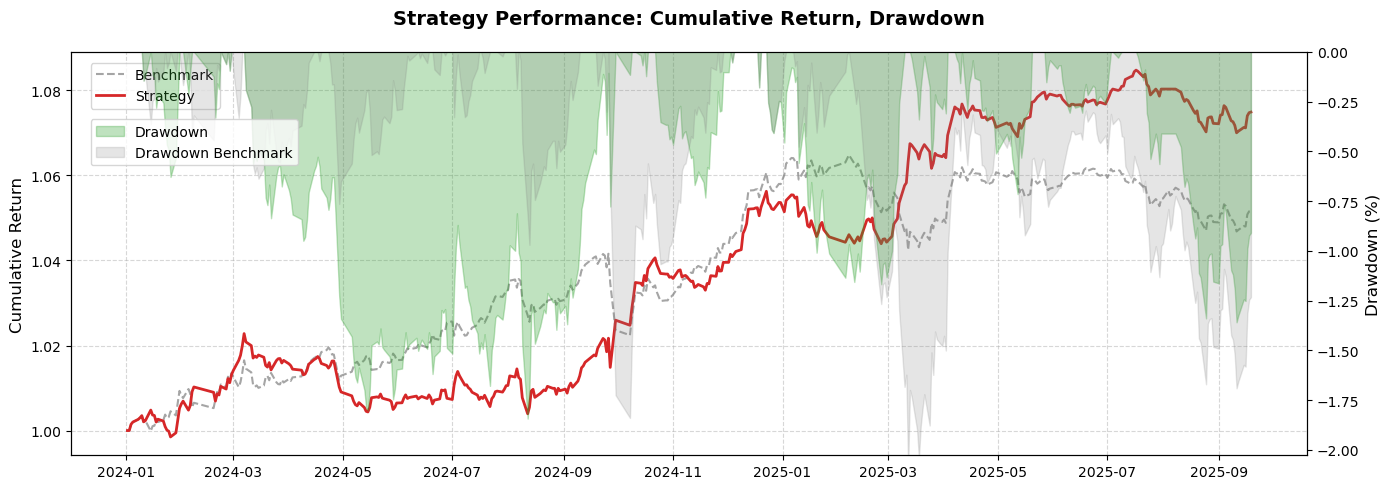

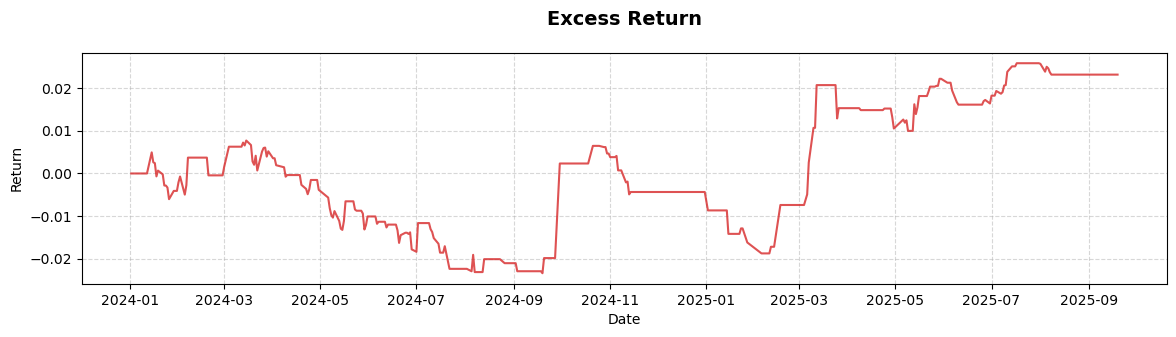

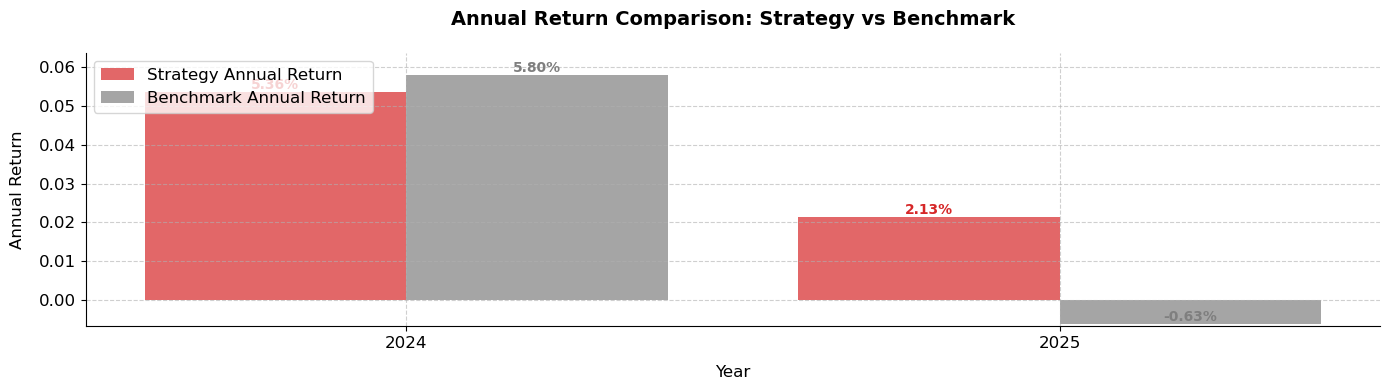

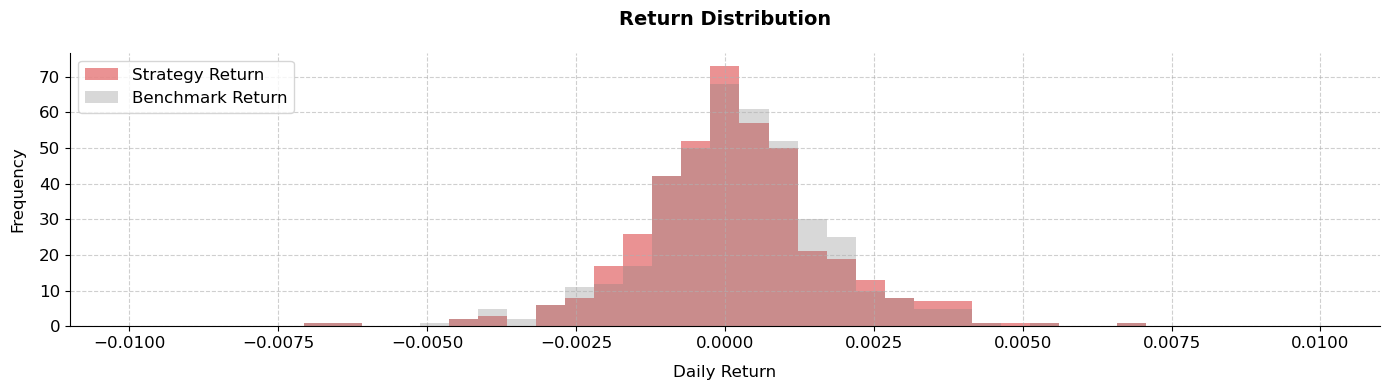

,Cummulative Return,Annual Return,Volatility,Sharpe Ratio,Max Drawdown,Calmar Ratio,Win Rate,Profit Factor
value,0.0749,0.044506,0.02649,1.680101,-0.018427,2.415284,0.544554,1.358841


,date,cmo_sign
0,2024-01-02,1.0
1,2024-01-03,1.0
2,2024-01-04,1.0
3,2024-01-05,1.0
4,2024-01-08,1.0
...,...,...
413,2025-09-15,1.0
414,2025-09-16,1.0
415,2025-09-17,1.0
416,2025-09-18,1.0


In [5]:

from Backtrader import StrategyBacktester
import datetime
import numpy as np
np.random.seed(0)

#设置日期
test_start_year =2024
test_end_year = 2025
for i in merged_signal.columns:
    if i in ['cmo_sign']:
        print('*************************************',i,'*************************************')
        backtester = StrategyBacktester(merged_signal, 
                                        start_year=test_start_year, 
                                        end_year=test_end_year, 
                                        signal_column=i,
                                        price_column='open', 
                                        initial_capital=1e9, 
                                        rf=0., 
                                        slippage=0.
                                        )

        # 执行回测
        backtester.run_backtest()

        # 可视化策略 vs 基准净值
        backtester.plot_pnl_curve()
        display(backtester.evaluate_performance())
        display(backtester.result[['date',i]])
